In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


df= pd.read_csv("/Users/sa19/Desktop/Phase-1-Portfolio-Project/csv/nyc_all_parks_filtered.csv")




In [2]:
df.shape

(18802, 9)

In [3]:
df.describe()

,attendance
count,18656.000000
mean,95.027819
std,296.508019
min,-42.000000
25%,8.000000
50%,25.000000
75%,76.000000
max,7995.000000


In [4]:
# list all columns in my dataset
df.columns.tolist()

['date',
 'borough',
 'location',
 'event_type',
 'category',
 'attendance',
 'audience',
 'classification',
 'time']

In [5]:
df.isnull().sum()

date                 0
borough              0
location             0
event_type        7039
category            24
attendance         146
audience          7039
classification    3123
time                 0
dtype: int64

In [6]:
#Drop all nulls, want to 
data_cleaned = df.dropna()


In [7]:
print(data_cleaned)


             date        borough  \
5      2017-01-06          Bronx   
6      2017-01-06          Bronx   
7      2017-01-13          Bronx   
8      2017-01-13          Bronx   
11     2017-01-28          Bronx   
...           ...            ...   
18182  2024-08-21          Bronx   
18425  2024-09-21  Staten Island   
18521  2024-10-10      Manhattan   
18588  2024-10-19       Brooklyn   
18592  2024-10-23          Bronx   

                                                location  \
5                           Owen Dolen Recreation Center   
6                           Owen Dolen Recreation Center   
7                           Owen Dolen Recreation Center   
8                           Owen Dolen Recreation Center   
11                          St. Mary's Recreation Center   
...                                                  ...   
18182                           Williamsbridge Oval Park   
18425  Franklin D. Roosevelt Boardwalk and Beach, Sou...   
18521                      

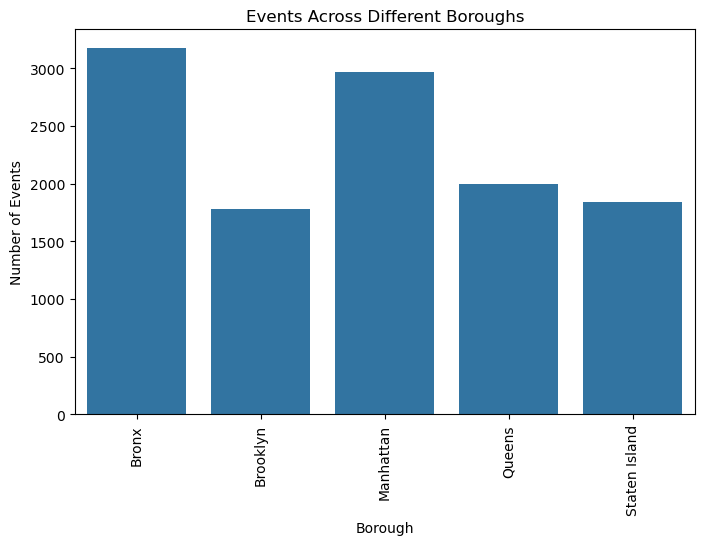

In [8]:

event_counts = df.groupby("borough")["event_type"].count().reset_index() 

# swap out attendents and use count of event_type as y-axis

plt.figure(figsize=(8, 5))

# Count the number of events per borough
event_counts = df.groupby("borough")["event_type"].count().reset_index()
sns.barplot(data=event_counts,x="borough", y="event_type")

plt.xticks(rotation=90)  
plt.title("Events Across Different Boroughs")
plt.xlabel("Borough")
plt.ylabel("Number of Events")
plt.show()


How does the event distribution vary across different boroughs?

The Bronx has hosted over 3,000 events, making it one of the most popular boroughs for event gatherings. This suggests that the Bronx could be a key destination for hosting events.

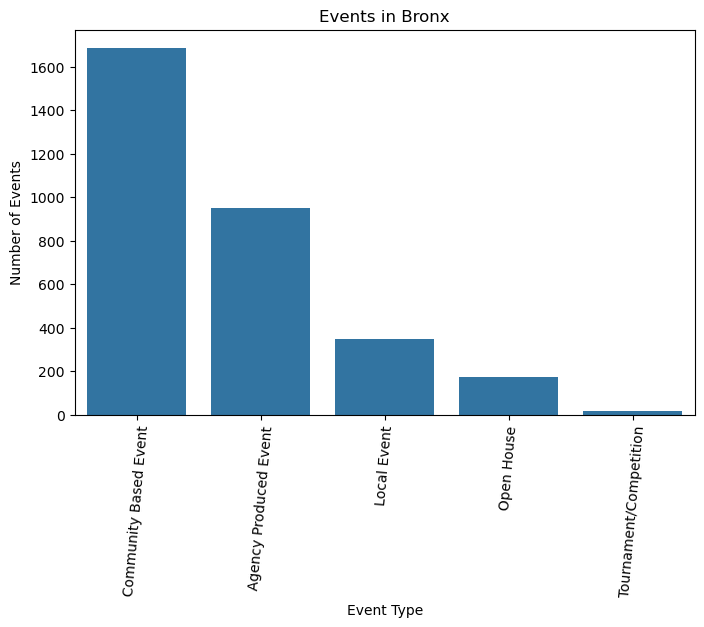

In [29]:

borough_name = "Bronx"
borough_data = df[df["borough"] == borough_name]

# Count the occurrences of each event_type in the Bronx
event_counts = borough_data["event_type"].value_counts().reset_index(name='event_count')

# Rename columns for clarity
event_counts.columns = ['event_type', 'event_count']
plt.figure(figsize=(8, 5))
sns.barplot(data=event_counts, x="event_type", y="event_count")

# Customize plot
plt.xticks(rotation=85)
plt.title(f"Events in {borough_name}")
plt.xlabel("Event Type")
plt.ylabel("Number of Events")
plt.show()



Which types of events were most frequently held in the Bronx?

Among the five event types in the Bronx, community-based events were the most frequently held.


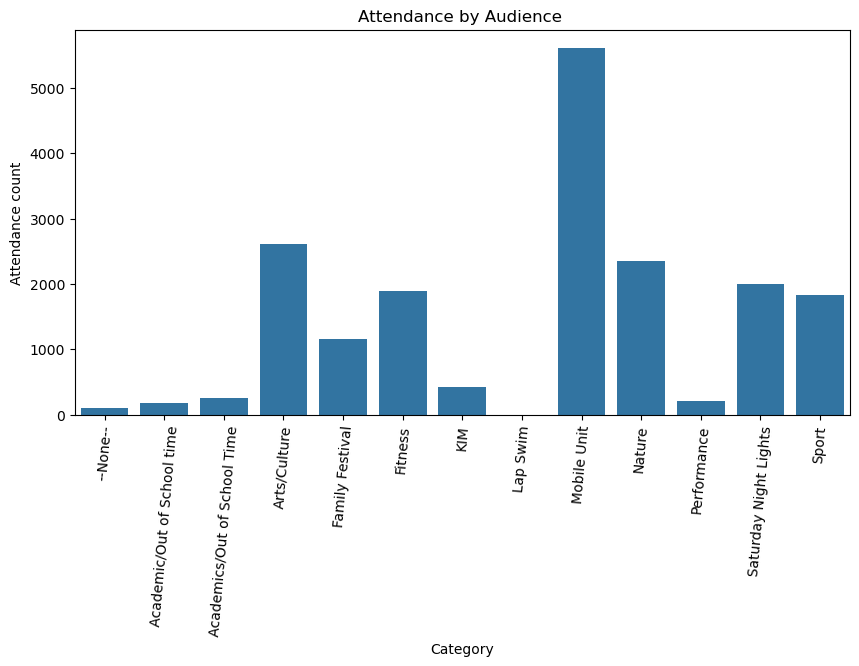

In [28]:
# Aggregate data: compute the mean attendance per category
g_data = df.groupby('category')['attendance'].count().reset_index()

# Create the scatter plot using the aggregated data
plt.figure(figsize=(10, 5))
sns.barplot(data=g_data, x="category", y="attendance")

# Customize the plot
plt.xticks(rotation=85)
plt.title("Attendance by Audience ")
plt.xlabel("Category")
plt.ylabel("Attendance count")
plt.show()

 Among all categories, the mobile unit recorded the highest attendance.In the context of event categories, mobile units can refer to any event or service setup that is designed to move from place to place rather than being fixed in one location